In [23]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_excel('Russian Federation.xlsx', sheet_name='Russian Fed by Residence',skiprows=20,skipfooter=2)

In [4]:
data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Both,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,..,...,2,11,11,12,16,11,..,..,..,..
1,Emigrants,Both,Albania,908,Europe,925,Southern Europe,901,Developed regions,..,...,..,5,8,3,..,..,..,..,..,..
2,Emigrants,Both,Algeria,903,Africa,912,Northern Africa,902,Developing regions,..,...,..,6,2,2,..,..,..,..,..,..
3,Emigrants,Both,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,..,...,..,28,33,16,..,..,..,..,..,..
4,Emigrants,Both,Angola,903,Africa,911,Middle Africa,902,Developing regions,..,...,..,7,4,0,..,..,..,..,..,..


In [5]:
data.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
332,Immigrants,Both,Wallis and Futuna Islands,909,Oceania,957,Polynesia,902,Developing regions,..,...,..,1,0,1,..,..,..,..,..,..
333,Immigrants,Both,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,..,...,..,3,1,0,..,..,..,..,..,..
334,Immigrants,Both,Yemen,935,Asia,922,Western Asia,902,Developing regions,..,...,..,7,8,7,..,..,..,..,..,..
335,Immigrants,Both,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,..,...,..,29,17,3,..,..,..,..,..,..
336,Immigrants,Both,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,..,...,..,0,0,1,..,..,..,..,..,..


In [7]:
data.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [8]:
data.drop(['AREA','REG','DEV','Coverage'], axis=1, inplace=True) #Удалить колонки, axis [0,1]=[строка\столбик]
data.rename(columns={'OdName':'Country'}, inplace=True) #переименновать для удобства
data.replace('..', 0,inplace=True) # заменить ерунду на норм числа
data['Total'] = data.sum(axis=1) #создать колокну
data.set_index('Country', inplace=True) #Задать индексы
data=data[data.Type=='Immigrants'] #фильтр датафрейм

In [9]:
years=range(1980,2014)

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [12]:
country_name=r'Uzbekistan'

In [13]:
data.loc[country_name, years]

1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991     69149
1992    112442
1993     91164
1994    146670
1995    112312
1996     49970
1997     39620
1998     41800
1999     41615
2000     40810
2001     24873
2002     24951
2003     21457
2004     14948
2005     30436
2006     37126
2007     52802
2008     43518
2009     42539
2010     24100
2011         0
2012         0
2013         0
Name: Uzbekistan, dtype: object

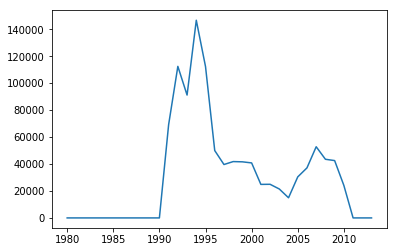

In [14]:
plt.plot(data.loc[country_name, years])

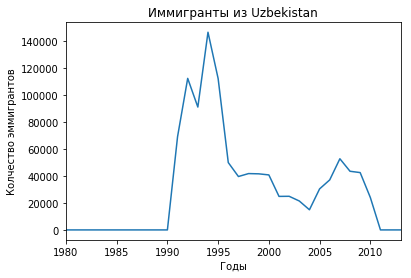

In [15]:
data.loc[country_name, years].plot(kind='line')
plt.title('Иммигранты из '+ country_name)
plt.ylabel('Колчество эммигрантов')
plt.xlabel('Годы')
#plt.text(1993, 31000, 'Опа') 
plt.show()

In [16]:
data.sort_values(['Total'], ascending=False, axis=0,inplace=True)
top5 =data.head()
top5 =top5[years].transpose()

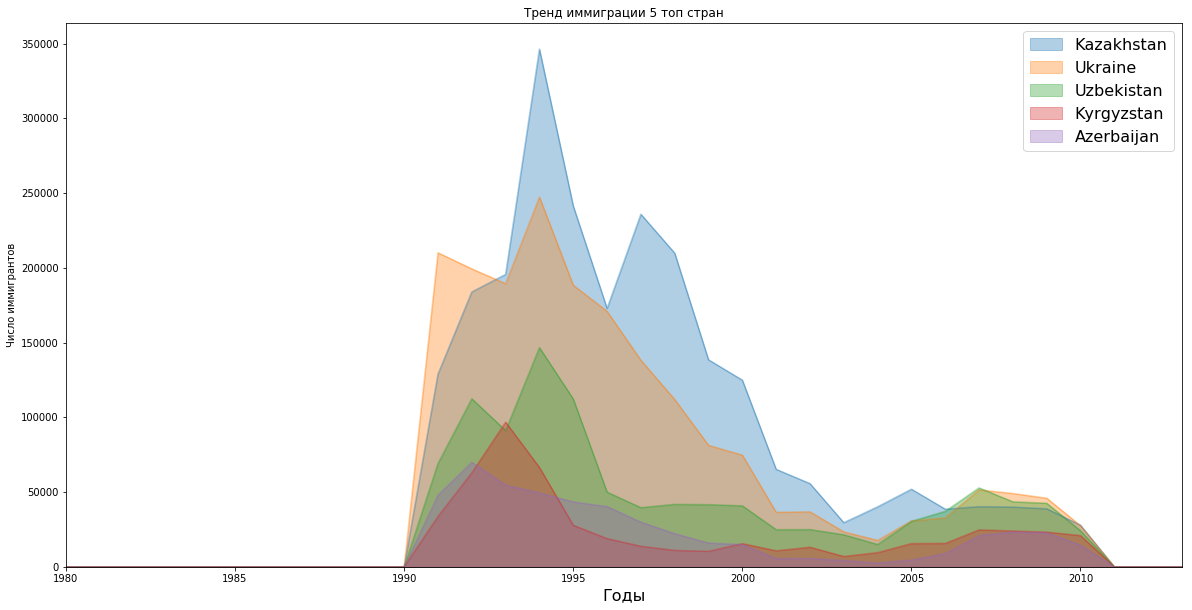

In [17]:
top5.plot(kind='area', stacked=False,alpha=0.35,figsize=(20, 10))
plt.title('Тренд иммиграции 5 топ стран')
plt.ylabel('Число иммигрантов')
plt.xlabel('Годы',fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [18]:
not_top5 =data.tail()
not_top5 =not_top5[years].transpose()

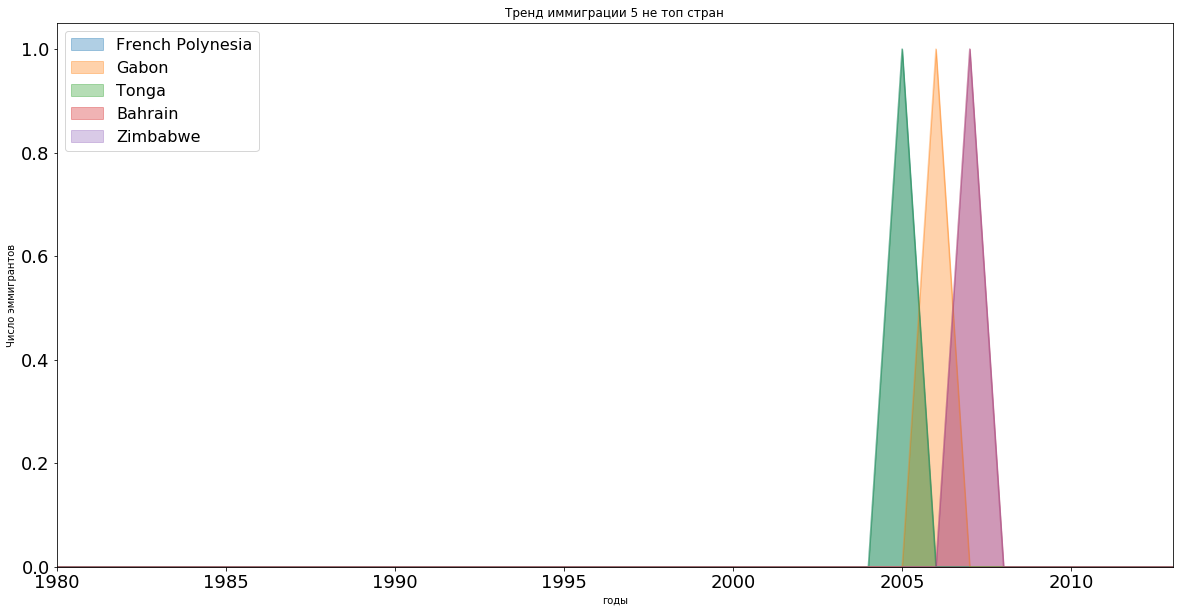

In [19]:
ax = not_top5.plot(kind='area', stacked=False,alpha=0.35, figsize=(20, 10))

ax.set_title('Тренд иммиграции 5 не топ стран')
ax.set_ylabel('Число эммигрантов')
ax.set_xlabel('годы')
plt.legend(fontsize=16)
ax.tick_params(labelsize=18)

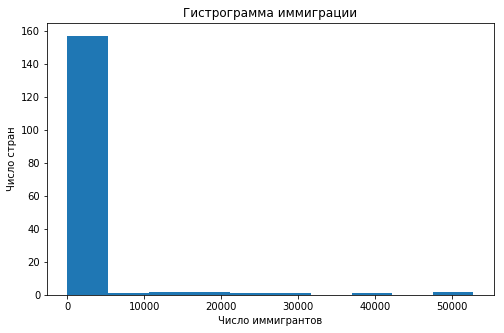

In [20]:
data[2007].plot(kind='hist', figsize=(8, 5))

plt.title('Гистрограмма иммиграции') 
plt.ylabel('Число стран')
plt.xlabel('Число иммигрантов') 

plt.show()

In [24]:
count, bin_edges = np.histogram(data[2007])
print(count) 
print(bin_edges)

[157   1   2   2   1   1   0   1   0   2]
[    0.   5280.2 10560.4 15840.6 21120.8 26401.  31681.2 36961.4 42241.6
 47521.8 52802. ]


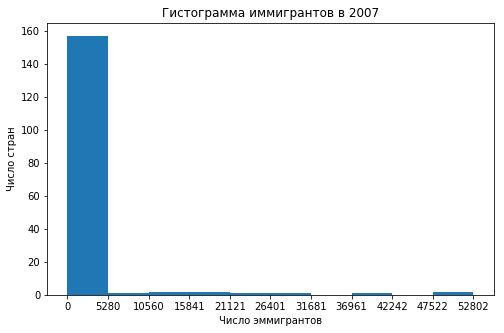

In [25]:
data[2007].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Гистограмма иммигрантов в 2007')
plt.ylabel('Число стран') 
plt.xlabel('Число эммигрантов')

plt.show()

In [28]:
data.index.values #список стран

array(['Kazakhstan', 'Ukraine', 'Uzbekistan', 'Kyrgyzstan', 'Azerbaijan',
       'Georgia', 'Tajikistan', 'Armenia', 'Belarus',
       'Republic of Moldova', 'Turkmenistan', 'Latvia', 'Estonia',
       'Lithuania', 'Germany', 'China', 'Israel',
       'United States of America', 'Bulgaria', 'Greece',
       'China (including Hong Kong Special Administrative Region)',
       'Afghanistan', 'Turkey', 'Finland', 'Syrian Arab Republic',
       'Poland', 'Viet Nam', 'Canada', 'Cuba', 'Australia', 'Sweden',
       'Italy', 'France', 'India', 'Republic of Korea',
       'United Kingdom of Great Britain and Northern Ireland', 'Serbia',
       'Japan', 'Austria', 'Czech Republic', 'Lebanon', 'Spain',
       'Morocco', 'Jordan', 'Mongolia', 'Norway', 'Kenya', 'Egypt',
       'Iraq', "Democratic People's Republic of Korea", 'Congo',
       'Netherlands', 'Pakistan', 'Iran (Islamic Republic of)',
       'Switzerland', 'Nigeria', 'Bosnia and Herzegovina', 'Hungary',
       'Cyprus', 'Bangladesh', '

In [29]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
#доступные цвета

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


In [30]:
username1=r"Kazakhstan"
username2=r"Republic of Moldova"

In [31]:
df1 = data.loc[username1, years]
df2 = data.loc[username2, years]

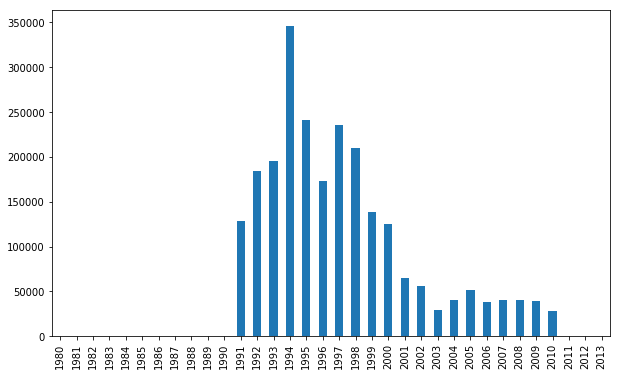

In [32]:
df1.plot(kind='bar', figsize=(10, 6))

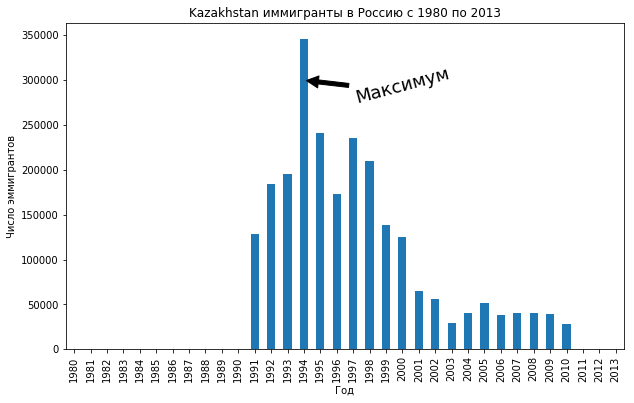

In [33]:
df1.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Год') 
plt.ylabel('Число эммигрантов') 
plt.title(username1 +' иммигранты в Россию с 1980 по 2013') 

plt.annotate('Maксимум', 
             xy=(14, 300000),
             xytext=(17, 270000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             rotation=15,                  
             va='bottom',                    
             ha='left',
             fontsize=18
            )

plt.show()

In [ ]:
plt.subplot(2, 1, 1)
df1.plot(kind='bar',figsize=(13, 10))
plt.title(username1 +' иммигранты в Россию с 1980 по 2013')
plt.subplot(2, 1, 2)
plt.title(username2 +' иммигранты в Россию с 1980 по 2013')
df2.plot(kind='bar')
#plt.savefig('kek.png')